## Import librarys

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.naive_bayes     import GaussianNB
from scipy.stats import norm
import seaborn as sns

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings("ignore")

## Import data 

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

### Splitting

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Feature Scaling

In [4]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Probability distribution

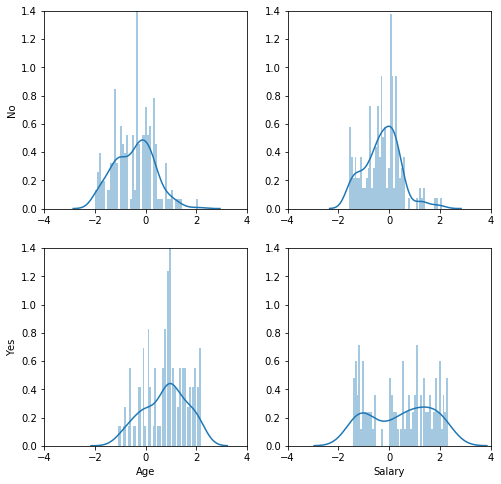

In [5]:
ageNo     = [a[0] for b,a in zip(y_train,X_train) if b==0]
ageYes    = [a[0] for b,a in zip(y_train,X_train) if b==1]
SalaryNo  = [a[1] for b,a in zip(y_train,X_train) if b==0]
SalaryYes = [a[1] for b,a in zip(y_train,X_train) if b==1]

bins = 50; xlim = [-4,4]; ylim = [0,1.4]

plt.figure(figsize=(8,8))
plt.subplot(221)
sns.distplot(ageNo,bins=bins)
plt.xlim(xlim); plt.ylim(ylim)
plt.ylabel('No')

plt.subplot(222)
sns.distplot(SalaryNo,bins=bins)
plt.xlim(xlim); plt.ylim(ylim)

plt.subplot(223)
sns.distplot(ageYes,bins=bins)
plt.xlim(xlim); plt.ylim(ylim)
plt.ylabel('Yes'); plt.xlabel('Age')

plt.subplot(224)
sns.distplot(SalaryYes,bins=bins)
plt.xlim(xlim); plt.ylim(ylim)
plt.xlabel('Salary')

plt.show()

## Naive Bayes

In [6]:
class gaussianFunction:
    def __init__(self,mean,std):
        self.mean = mean
        self. std = std
    
    def __getitem__(self,x):
        return (1/(self.std*np.sqrt(2*np.pi))) * np.exp( -(x-self.mean)*(x-self.mean)/( 2*self.std*self.std ) )
    
def naiveBayes(func,prob,X):
    n_class = len(prob)
    y_pred  = list()
    
    for x in X:
        scores = list()
        for c in range(n_class):    
            likelihood = [ gauss[feature]  for feature,gauss in zip(x,func[c]) ]
            likelihood = np.prod(likelihood)
            prior = prob[c] 
            scores.append(prior*likelihood)
        y_pred.append( np.argmax(scores) )
    
    return y_pred

### Calculate probability distribution

In [7]:
mean,std = norm.fit(   ageNo ); funAN = gaussianFunction(mean,std)
mean,std = norm.fit(   ageYes); funAY = gaussianFunction(mean,std)
mean,std = norm.fit(SalaryNo ); funSN = gaussianFunction(mean,std)
mean,std = norm.fit(SalaryYes); funSY = gaussianFunction(mean,std)

probY = np.sum(y_train)/len(y_train)
probN = 1 - probY

func = [ [funAN,funSN],[funAY,funSY] ]
prob = [     probN    ,    probY     ]

### Prediction

In [8]:
y_pred = naiveBayes(func,prob,X_test)
acc = [int(a==b)  for a,b in zip(y_test,y_pred)]
print( 'Accuracy:', np.sum(acc)*100/len(acc),'%' )

Accuracy: 90.0 %


In [9]:
def print_table(table):
    longest_cols = [
        (max([len(str(row[i])) for row in table]) + 3)
        for i in range(len(table[0]))
    ]
    row_format = "".join(["{:>" + str(longest_col) + "}" for longest_col in longest_cols])
    for row in table:
        print(row_format.format(*row))

TP = np.sum([int(a==0 and b==0)  for a,b in zip(y_test,y_pred)])
FP = np.sum([int(a==1 and b==0)  for a,b in zip(y_test,y_pred)])
FN = np.sum([int(a==0 and b==1)  for a,b in zip(y_test,y_pred)])
TN = np.sum([int(a==1 and b==1)  for a,b in zip(y_test,y_pred)])

table = [ [" ", "P", "N"],
          ["T",  TP,  FP],
          ["F",  FN,  TN] ]

print_table(table)

        P    N
   T   65    7
   F    3   25


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


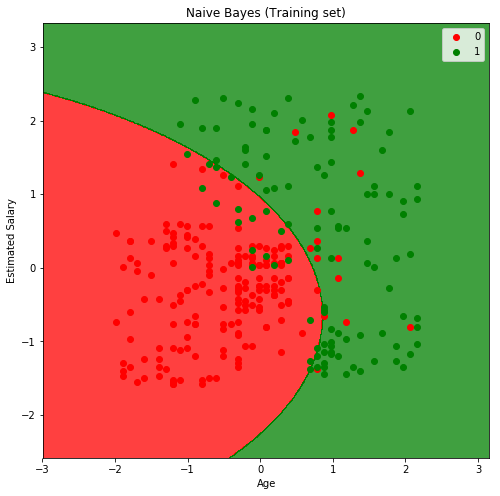

In [10]:
# larger graph 
width  = 8; height = 8
plt.figure(figsize=(width, height))
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, np.array(naiveBayes(func,prob,np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


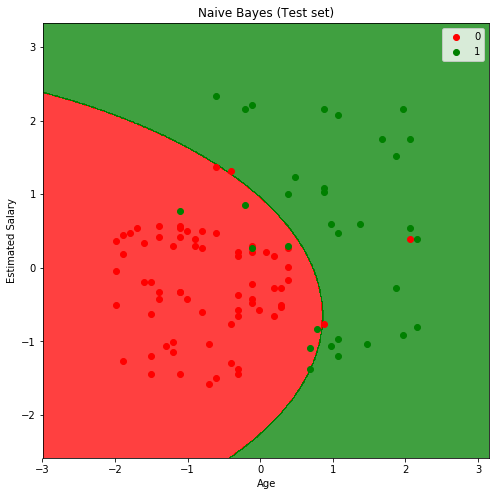

In [11]:
# larger graph 
width = 8; height = 8
plt.figure(figsize=(width, height))
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, np.array(naiveBayes(func,prob,np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()